In [1]:
import numpy as np 
import pandas as pd 

# plot
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# scaling
from sklearn.preprocessing import StandardScaler
# data split
from sklearn.model_selection import train_test_split


# Data imputation
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

# ANN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping

# model evaluation
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.metrics import plot_confusion_matrix
# MISC
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



In [2]:
# read dataset from csv file
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project/data.csv")

In [3]:
dataset.shape

(6819, 96)

In [4]:
# check null, NA or duplicate values in the dataset
dataset.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [5]:
# check the datatype of the features
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [6]:
dataset.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,...,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.115001,0.190661,0.190633,0.190672,0.228813,0.323482,1.328641e+06,0.109091,0.184361,0.022408,0.847980,0.689146,0.689150,0.217639,5.508097e+09,1.566212e+06,0.264248,0.379677,4.032850e+05,8.376595e+06,0.630991,4.416337e+06,0.113177,0.886823,0.008783,...,0.522273,0.124095,3.592902e+06,3.715999e+07,0.090673,0.353828,0.277395,5.580680e+07,0.761599,0.735817,0.331410,5.416004e+07,0.934733,0.002549,0.029184,1.195856e+09,2.163735e+09,0.594006,2.471977e+09,0.671531,1.220121e+06,0.761599,0.331410,0.115645,0.649731,0.461849,0.593415,0.315582,0.031506,0.001173,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686

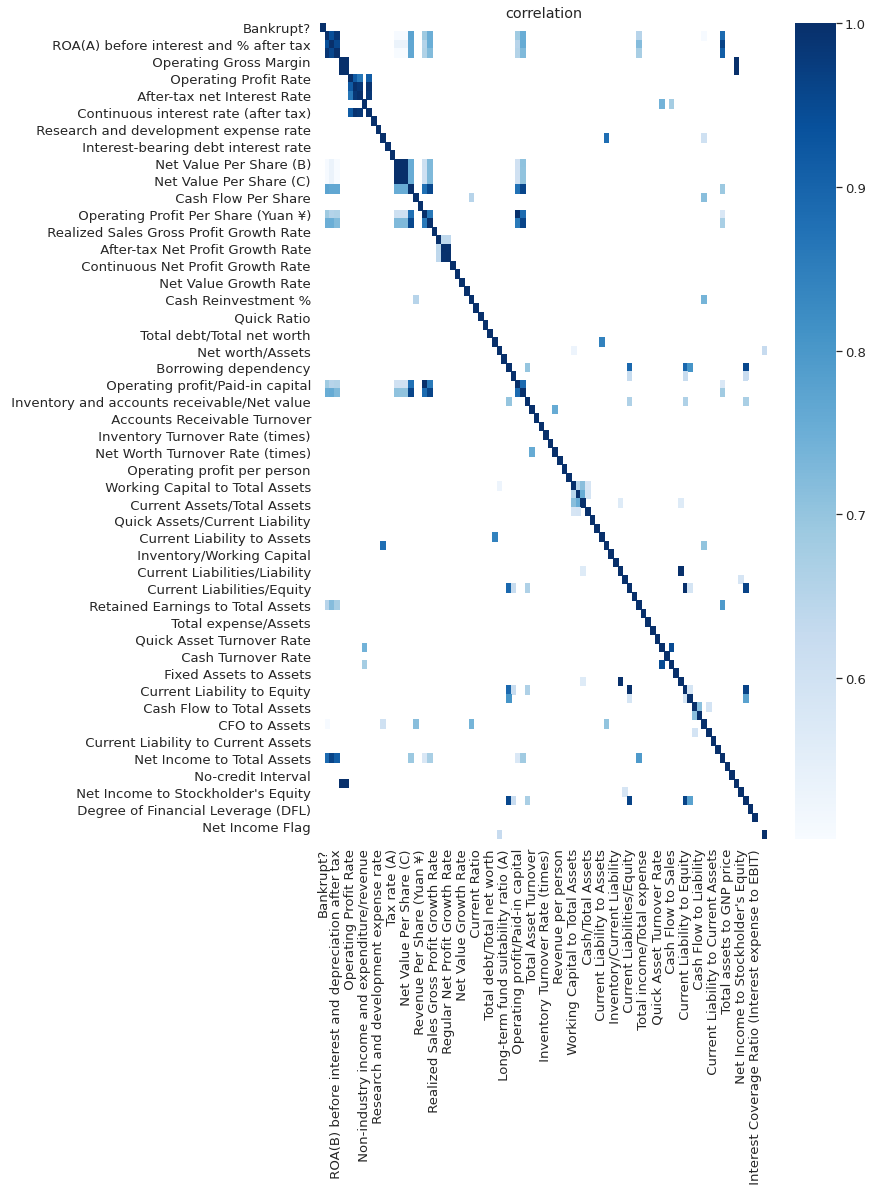

In [7]:
# correlation above 0.50

correlation_five = dataset.corr()
correlation_five = correlation_five[correlation_five >0.50]

plt.figure(figsize=(10,15))
sns.set_style('white')
sns.set_context(context='notebook',font_scale=1.2)
sns.heatmap(correlation_five,cmap="Blues");
plt.title('correlation');

In [8]:
# filter the highly correlated variables

corr_df = dataset.corr()
high_corr = ~(corr_df.mask(np.eye(len(corr_df ), dtype=bool)).abs() > 0.5).any()
high_corr

corr_df = corr_df.loc[high_corr,high_corr]
print(corr_df.columns)

Index(['Bankrupt?', ' Operating Expense Rate',
       ' Research and development expense rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Revenue Per Share (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Continuous Net Profit Growth Rate', ' Total Asset Growth Rate',
       ' Net Value Growth Rate', ' Total Asset Return Growth Rate Ratio',
       ' Current Ratio', ' Quick Ratio', ' Interest Expense Ratio',
       ' Total debt/Total net worth', ' Long-term fund suitability ratio (A)',
       ' Accounts Receivable Turnover', ' Average Collection Days',
       ' Inventory Turnover Rate (times)', ' Fixed Assets Turnover Frequency',
       ' Revenue per person', ' Operating profit per person',
       ' Allocation rate per person', ' Quick Assets/Current Liability',
       ' Cash/Current Liability', ' Inventory/Working Capital',
       ' Inventory/Current Liability',
       ' Long-term Liability to Current Assets', ' Total income/Total ex

In [9]:
#let us check the Target variable
dataset['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

Text(0.5, 1.0, 'Target feature - Bankrupt?')

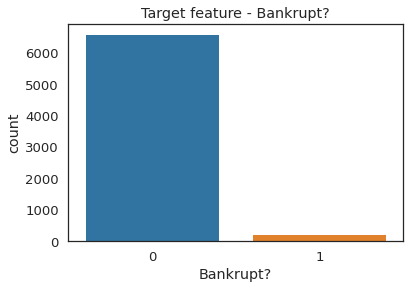

In [10]:
# plot data to check balance
sns.countplot(x=dataset['Bankrupt?'])
plt.title('Target feature - Bankrupt?')

In [11]:
# There is imbalance in the Target value, we need to oversample it based using SMOTE
X=dataset.drop(labels=['Bankrupt?'], axis=1)
y=dataset['Bankrupt?']
oversample = SMOTE()
X,y=oversample.fit_resample(X,y)

In [12]:
# Standardize the Independent Variable
scaler=StandardScaler()
X_scale=scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scale, y,test_size=0.2)

In [13]:
# Check the size after balancing
X_train.shape,X_test.shape

((10558, 95), (2640, 95))

In [14]:
# early stopping
early_stop =  EarlyStopping(monitor='val_auc',mode='max', verbose=1, patience=27,restore_best_weights=True)

# Building ANN Model
model =  Sequential()

model.add(Dense(units=50,activation='relu'))
model.add(Dropout(0.20))
model.add(Dense(units=75,activation='relu'))
model.add(Dropout(0.20))

model.add(Dense(units=50,activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))

# compile ANN
model.compile(loss='binary_crossentropy', optimizer='adam',metrics = ['accuracy'])

In [15]:
# Train ANN
model.fit(x=X_train, 
          y=y_train, 
          epochs=20,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/20
330/330 [==============================] - 2s 5ms/step - loss: 0.3782 - accuracy: 0.8468 - val_loss: 0.2164 - val_accuracy: 0.9125
Epoch 2/20
330/330 [==============================] - 1s 3ms/step - loss: 0.2128 - accuracy: 0.9204 - val_loss: 0.1681 - val_accuracy: 0.9405
Epoch 3/20
330/330 [==============================] - 1s 3ms/step - loss: 0.1724 - accuracy: 0.9374 - val_loss: 0.1256 - val_accuracy: 0.9572
Epoch 4/20
330/330 [==============================] - 1s 3ms/step - loss: 0.1442 - accuracy: 0.9489 - val_loss: 0.1082 - val_accuracy: 0.9678
Epoch 5/20
330/330 [==============================] - 1s 3ms/step - loss: 0.1380 - accuracy: 0.9525 - val_loss: 0.0982 - val_accuracy: 0.9670
Epoch 6/20
330/330 [==============================] - 1s 3ms/step - loss: 0.1072 - accuracy: 0.9651 - val_loss: 0.0844 - val_accuracy: 0.9731
Epoch 7/20
330/330 [==============================] - 1s 2ms/step - loss: 0.0905 - accuracy: 0.9690 - val_loss: 0.0779 - val_accuracy: 0.9754
Epoch 

In [16]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1364
           1       0.97      1.00      0.99      1276

    accuracy                           0.99      2640
   macro avg       0.99      0.99      0.99      2640
weighted avg       0.99      0.99      0.99      2640



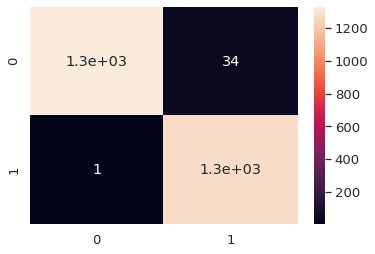

In [17]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)
